In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [ ]:
# Link Compartilhavel do Google Drive
url='https://drive.google.com/file/d/1YzwpngfEDmeQK_x3A80m7q06YGdgqySz/view?usp=share_link'

#ajuste da URL
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
ideb = pd.read_csv(url)

### Atividade 2: Selecione apenas os dados referentes ao ano de 2019 e agrupe os dados por estado, considerando a média.

In [ ]:
# seu código
ideb_2019 = ideb[ideb.ano == 2019]
ideb_2019.head()

,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
8947,2019,AC,1200104,estadual,fundamental,iniciais (1-5),98.2,0.980807,288.92,263.10,8.261611,8.1,5.3
8948,2019,AC,1200104,publica,fundamental,iniciais (1-5),96.5,0.963009,254.78,231.63,7.037912,6.8,5.2
8949,2019,AC,1200401,municipal,fundamental,iniciais (1-5),97.7,0.977302,246.47,228.63,6.824960,6.7,6.0
8950,2019,AC,1200450,estadual,fundamental,iniciais (1-5),97.6,0.976889,256.67,231.75,7.076153,6.9,5.5
8951,2019,AL,2701407,municipal,fundamental,iniciais (1-5),100.0,0.999599,261.32,223.47,7.014348,7.0,4.3


In [ ]:
# agrupando os dados por estado, agregando pela média
ideb_2019 = ideb_2019.groupby(by='sigla_uf').mean().reset_index()
ideb_2019.head(2)

<ipython-input-8-37effd32aa7c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ideb_2019 = ideb_2019.groupby(by='sigla_uf').mean().reset_index()


,sigla_uf,ano,id_municipio,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,AC,2019.0,1.200358e+06,88.561184,0.888334,245.253478,237.995942,5.207447,4.671739,4.584431
1,AL,2019.0,2.704814e+06,92.081591,0.924287,237.883189,231.412708,4.847563,4.509295,4.171070


### Atividade 3: Padronize os dados.

In [ ]:
# instanciando a função
scaler = StandardScaler()

# criando uma cópia do DataFrame
df_scaled  = ideb_2019.copy()

# removendo dados categóricos
df_scaled.drop(columns=['sigla_uf','ano'], inplace=True)

# aplicando a padronização
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

# acrescentando a coluna estado
df_scaled['sigla_uf'] = ideb_2019['sigla_uf']

df_scaled.head()

,id_municipio,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao,sigla_uf
0,-1.342745,-0.025280,-0.003640,0.080727,-0.016434,0.140599,0.092154,-0.380744,AC
1,-0.167476,0.801179,0.851939,-0.437122,-0.531887,-0.656695,-0.201424,-1.300391,AL
2,-1.263200,-0.426168,-0.437447,-1.474271,-1.443233,-1.244755,-1.063297,-1.029374,AM
3,-1.030255,-1.670713,-1.653981,-1.889188,-1.751891,-1.565175,-1.674063,-0.756544,AP
4,-0.001533,-1.323101,-1.306250,-0.713999,-0.626401,-0.799997,-1.060175,-1.317736,BA


### Atividade 4: Use o método do cotovelo para encontrar um valor adequado de k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

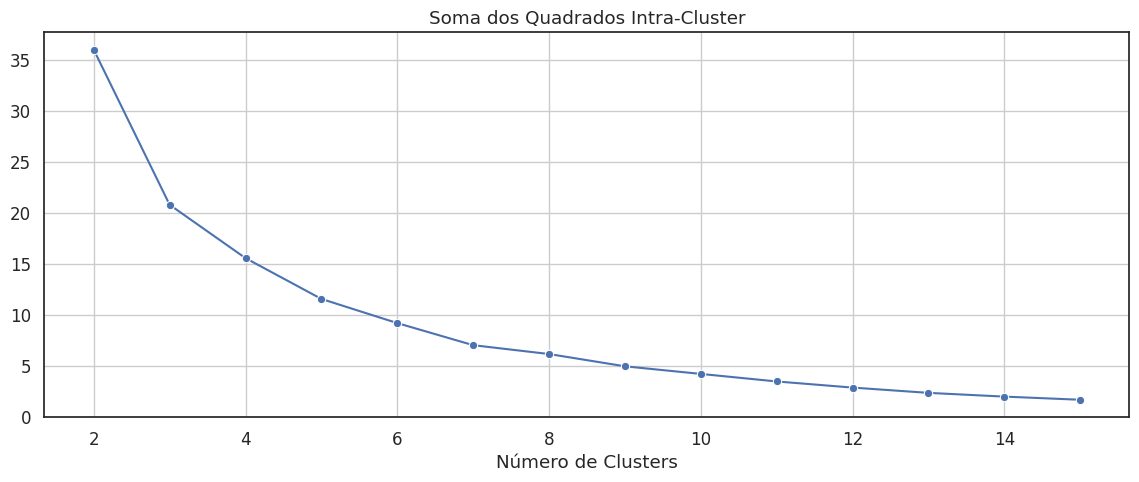

In [ ]:
sns.set(style='white', font_scale=1.1, rc={'figure.figsize':(14,5)})
# seu código
inercia = []
k_min = 2
k_max = 15

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['taxa_aprovacao',
                          'nota_saeb_matematica',
                          'nota_saeb_lingua_portuguesa',
                          'ideb']])
    inercia.append(kmeans.inertia_)

sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.title('Soma dos Quadrados Intra-Cluster')
plt.xlabel('Número de Clusters')
plt.grid(True)

### Atividade 5: Use o método da silhueta para encontrar um valor adequado de k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

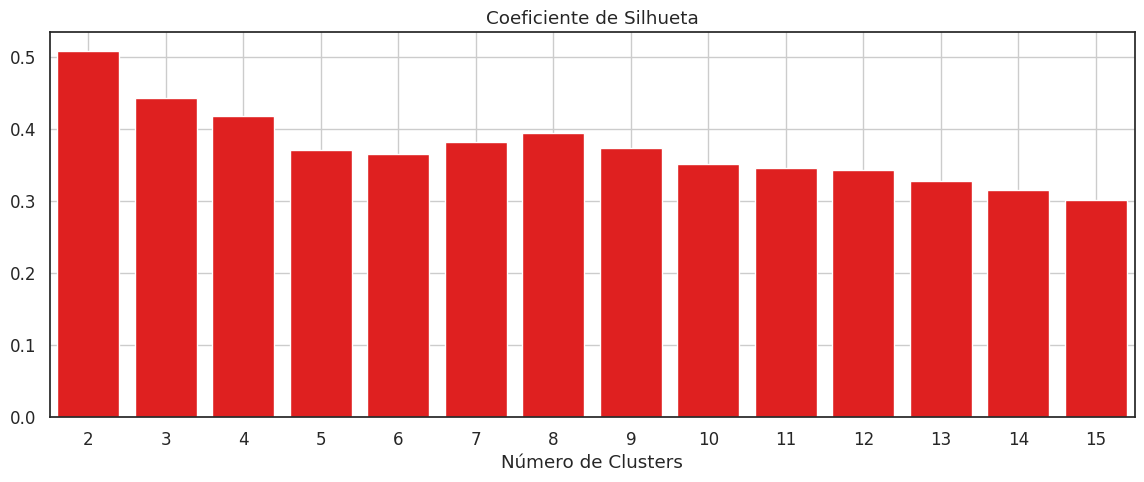

In [ ]:
# seu código
silhueta = []
k_min = 2
k_max = 15
n = [i for i in range(k_min, k_max+1)]

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['taxa_aprovacao',
                          'nota_saeb_matematica',
                          'nota_saeb_lingua_portuguesa',
                          'ideb']])
    silhueta.append(silhouette_score(df_scaled[['taxa_aprovacao',
                          'nota_saeb_matematica',
                          'nota_saeb_lingua_portuguesa',
                          'ideb']],
                                     kmeans.labels_,
                                     metric='euclidean'))

sns.barplot(x=n, y=silhueta, color='red')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.grid(True)

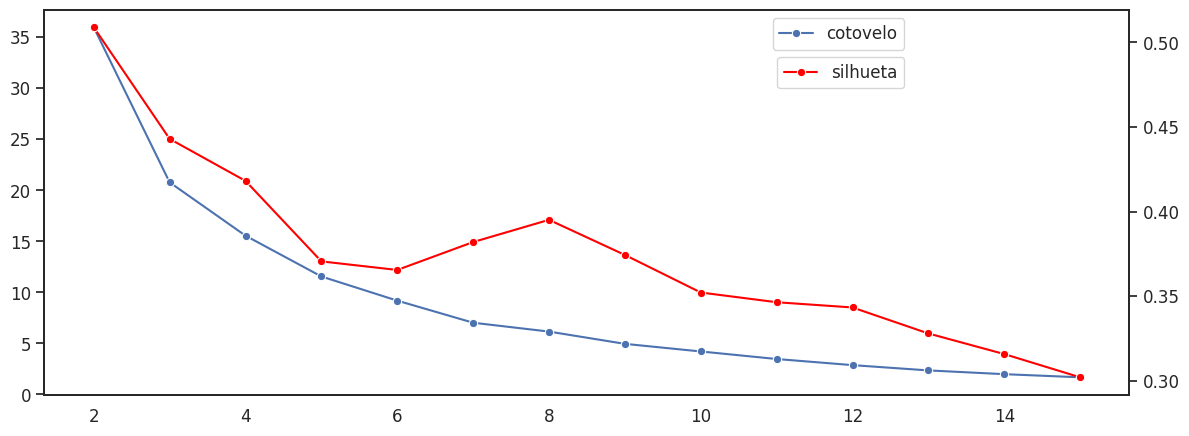

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.legend(labels=["cotovelo"], bbox_to_anchor=(0.8, 1), loc='upper right')
ax2 = ax.twinx()
sns.lineplot(x=range(k_min,k_max+1), y=silhueta, marker='o', color='red')
plt.legend(labels=["silhueta"], bbox_to_anchor=(0.8, 0.9), loc='upper right');

### Atividade 6: Faça a clusterização com o valor escolhido para k.

In [ ]:
# instanciando o algoritmo
kmeans = KMeans(n_clusters=4, random_state=42)

# aplicando o algoritmo aos dados 
kmeans.fit(df_scaled[['taxa_aprovacao',
                        'nota_saeb_matematica',
                        'nota_saeb_lingua_portuguesa',
                        'ideb']])

# criando a coluna 'grupo'
df_scaled['grupos'] = kmeans.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Atividade 7: Faça um gráfico de dispersão destacando cada grupo.

In [ ]:
fig = px.scatter_3d(df_scaled, x='taxa_aprovacao', y='nota_saeb_matematica', z='nota_saeb_lingua_portuguesa',
              color='grupos')
fig.show()

In [ ]:
fig = px.scatter_3d(df_scaled, x='ideb', y='nota_saeb_matematica', z='taxa_aprovacao',
              color='grupos')
fig.show()

In [ ]:
fig = px.scatter_3d(df_scaled, x='ideb', y='nota_saeb_matematica', z='nota_saeb_lingua_portuguesa',
              color='grupos')
fig.show()

### Atividade 8: Quais são os estados de cada grupo?

In [ ]:
# seu código
fig = px.scatter_3d(df_scaled, x='taxa_aprovacao', y='nota_saeb_matematica', z='nota_saeb_lingua_portuguesa',
              color='grupos',text='sigla_uf')
fig.show()

### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

In [ ]:
colunas_plotadas = ['taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa','ideb']

In [ ]:
# seu código
for i in colunas_plotadas:
    fig = px.box(df_scaled, x="grupos", y=f'{i}')
    fig.show()

### Atividade 10: Podemos afirmar, estatisticamente, que os grupos são distintos? Isto é, os dados foram adequadamente clusterizados?

In [ ]:
# seu código

### Atividade 11: Faça a clusterização com outro valor para k.

In [ ]:
# seu código

### Atividade 12: Qual dos dois valores testados para k seria mais adequado?

Resposta: 

### Atividade 13: (Para refletir) Como poderíamos fazer a clusterização e visualizar os grupos se tivessemos que usar mais de duas variáveis?

Dica: Pesquise sobre Redução de Dimensionalidade, é um assunto bem divertido!